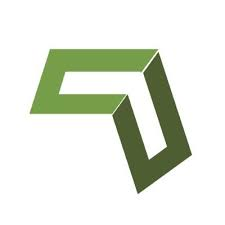

# Anomaly Detection Project
***

## Executive Summary
#### Overview

Presented with a set of questions regarding Code Up's cohorts' online traffic patterns for their use of class lessons and documentation, we are to explore the cohorts' web logs to discover answers to the questions given to us.  Using a SQL database and a .csv containing web logs and cohort data, we will be analyzing the data to find how the cohorts accessed the class lessons online.  

#### Project Goals
- Explore, visualize, and analyze data to discover answers to the questions given to us.
- Create an email in response to the request included below containing findings. 
- Create a single Executive Summary-like slide summarizing most important findings
- Create a Jupyter Notebook outlining work done to answer questions
- Answer at least 5 of the 8 questions asked in the request including:
    - 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
    - 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
    - 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
    - 4.  Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
    - 5.  At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
    - 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
    - 7.  Which lessons are least accessed?
    - 8.  Anything else I should be aware of?




#### Outline of Process

The plan for this project is to do the following:
- Acquire cohort schedule info from SQL database and join with cohorts.csv sent to us. 
- Prepare data by dropping columns, renaming columns, handling null values and creating new columns.
- Explore data by visualizing and analyzing data.
- Create questions based off questions sent to us and explore data for answers.
- Come up with conclusions and gather and notate findings.
- Create email and Google Slide with responses to questions and key findings

#### Conclusion & Key Findings




*** 
Project Scenario from Google Assignment

Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


Thank you

***

Other info:

* To turn in your project, email datascience@codeup.com with the subject line "Anomaly Detection Project"
-  To get 100 on this project you only need to answer 5 out of the 7 questions (along with the other deliverables listed below i.e. slide, your notebook, etc).
-  Submit a link to a final notebook on GitHub that asks and answers questions - document the work you do to justify findings
-  Compose an email with the answers to the questions/your findings, and in the email, include the link to your notebook in GitHub and attach your slide.
-  You will not present this, so be sure that the details you need your leader to convey/understand are clearly communicated in the email.
-  Your slide should be like an executive summary and be in form to present.
-  Continue to use best practices of acquire.py, prepare.py, etc.
-  Since there is no modeling to be done for this project, there is no need to split the data into train/validate/test
-  The cohort schedule is in the SQL database, and alumni.codeup.com has info as well.

# Acquire

We were given a .csv file containing cohorts data.  Will read that into a dataframe to explore.

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries 
import pandas as pd
import numpy as np

#Import custom libraries
import acquire

In [2]:
df_csv = pd.read_csv('cohorts.csv')

In [3]:
df_csv.head()

,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1
2,3,Carlsbad,2014-09-04,2014-11-05,1
3,4,Denali,2014-10-20,2015-01-18,1
4,5,Everglades,2014-11-18,2015-02-24,1


In [4]:
df_csv.shape

(46, 5)

In [5]:
df_csv.info

<bound method DataFrame.info of     cohort_id        name  start_date    end_date  program_id
0           1      Arches  2014-02-04  2014-04-22           1
1           2    Badlands  2014-06-04  2014-08-22           1
2           3    Carlsbad  2014-09-04  2014-11-05           1
3           4      Denali  2014-10-20  2015-01-18           1
4           5  Everglades  2014-11-18  2015-02-24           1
5           6    Franklin  2015-02-03  2015-05-26           1
6           7     Glacier  2015-06-05  2015-10-06           1
7           8     Hampton  2015-09-22  2016-02-06           1
8           9      Apollo  2015-03-30  2015-07-29           4
9          10      Balboa  2015-11-03  2016-03-11           4
10         11         Ike  2016-01-20  2016-05-12           1
11         12      Joshua  2016-03-08  2016-06-30           1
12         13       Kings  2016-05-23  2016-09-15           1
13         14      Lassen  2016-07-18  2016-11-10           1
14         15     Mammoth  2016-09-26 

- It looks like we have the Code Up cohorts names, dates started and date ended.

In [6]:
df = acquire.get_cohort_log_data()

In [7]:
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,2021-02-09,13:56:56,/,148,1.0,72.181.125.198
1,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,2021-02-09,13:58:43,/,148,1.0,72.181.125.198
2,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,2021-02-09,13:59:58,content/html-css,148,1.0,72.181.125.198
3,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,2021-02-09,13:59:59,content/html-css/gitbook/images/favicon.ico,148,1.0,72.181.125.198
4,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,2021-02-05,15:25:28,/,148,1.0,72.181.125.198


In [8]:
df.shape

(847330, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847330 non-null  int64  
 1   name        847330 non-null  object 
 2   slack       847330 non-null  object 
 3   start_date  847330 non-null  object 
 4   end_date    847330 non-null  object 
 5   created_at  847330 non-null  object 
 6   updated_at  847330 non-null  object 
 7   deleted_at  0 non-null       float64
 8   program_id  847330 non-null  int64  
 9   date        847330 non-null  object 
 10  time        847330 non-null  object 
 11  path        847329 non-null  object 
 12  user_id     847330 non-null  int64  
 13  cohort_id   847330 non-null  float64
 14  ip          847330 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 103.4+ MB


In [10]:
df.tail()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
847325,139,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2,2021-04-16,19:48:06,javascript-i/introduction/working-with-data-ty...,973,139.0,70.123.219.174
847326,139,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2,2021-04-16,20:07:20,javascript-i/introduction/operators,977,139.0,70.117.9.243
847327,139,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2,2021-04-16,20:09:53,javascript-i/introduction/variables,977,139.0,70.117.9.243
847328,139,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2,2021-04-16,20:09:56,javascript-i/introduction/primitive-types,977,139.0,70.117.9.243
847329,139,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2,2021-04-16,20:22:03,javascript-i/introduction/working-with-data-ty...,977,139.0,70.117.9.243
